# Combinatorics with SageMath: Databases

## Nadia Lafrenière
### Dartmouth College (🇺🇸) $\xrightarrow{🚌}$ Concordia University (🇨🇦) 

## EAUMP-ICTP School on Enumerative Combinatorics
### Arusha, Tanzania, July 28, 2023

In [1]:
import matplotlib.pyplot as plt  # So pictures of posets fit on the slides
plt.rcParams['figure.figsize'] = [8, 4]

# Interface with databases

**Two principles of SageMath that we have encoutered before:**
- It works well with other open-source software
- SageMath serves as a knowledge base: it countains a lot of algorithms and description of objects

The same principle is true for **open databases**!
<img src="images/logooeis.jpg" width="250"><img src="images/logo_findstat.png" width="150"/>
- OEIS
- FindStat
- A few other databases for knots, elliptic curves, etc.

# Online Encyclopedia of Integer Sequences: https://oeis.org/

- An *integer sequence* is a function $\{1,2,3,\ldots\} \to \mathbb{Z}$ (so it has a first term, and may have a last term; all images are integers).
- Likely the **most important database for math**.
- Very useful for number theory and combinatorics.
- Contains 364,067 sequences (as of Wednesday)!
- Beyond the data, entries contain formulae, generating functions, properties and references



## OEIS examples
### Catalan numbers
https://oeis.org/A000108

A refinement of the Catalan numbers are the **Narayana numbers**.

In [1]:
oeis('narayana')

0: A001263: Triangle of Narayana numbers T(n,k) = C(n-1,k-1)*C(n,k-1)/k with 1 <= k <= n, read by rows. Also called the Catalan triangle.
1: A000930: Narayana's cows sequence: a(0) = a(1) = a(2) = 1; thereafter a(n) = a(n-1) + a(n-3).
2: A090181: Triangle of Narayana (A001263) with 0 <= k <= n, read by rows.

https://oeis.org/A001263


What is your favourite sequence?

Some more famous sequences:

- The prime numbers, A000040
- The Fibonacci numbers, A000045

And sequences with two parameters also appear in the OEIS, as an array or a triangle.
- Pascal's triangle, A007318
- Triangle of Stirling numbers of second kind, A008277

### Identifying a sequence...

What is this?

```python
oeis(list(str(float(pi))))`
```

In [17]:
# What is this?

oeis(list(str(float(pi))))

0: A000796: Decimal expansion of Pi (or digits of Pi).
1: A212131: Decimal expansion of k such that e^(k*sqrt(163)) = round(e^(Pi*sqrt(163))).
2: A112602: Erroneous version of decimal expansion of Pi (see A000796 for the correct version).

### $\pi$

> `oeis(list(str(float(pi))))`

Takes $\pi$, `float` expands its decimal (to 16 digits of precision), `str` changes the number into a *string* (so a sequence) of characters, lists splits them. Asking the OEIS gives some choices for sequences.

In [23]:
print(pi)
print(float(pi))
print(str(float(pi)))
print(list(str(float(pi))))

pi
3.141592653589793
3.141592653589793
['3', '.', '1', '4', '1', '5', '9', '2', '6', '5', '3', '5', '8', '9', '7', '9', '3']


## OEIS: 364,067 sequences?

- The OEIS is a **comprehensive** list of integer sequences.
- It contains pretty much any sequences you can think of, so it can be helpful for your research!
- Some sequences are not very relevant.
- If you know a relevant sequence, e.g. something that appears in a research paper, **add it!** The OEIS is written by volunteer mathematicians like you and I.

## OEIS

Any question on the OEIS?

# FindStat

- A **statistic** is a function from a combinatorial object $\mathcal{O}$ to a set of number.
  Most often, it is a function $\mathcal{O} \to \mathbb{N}$, but the image can be in $\mathbb{Q}$ or $\mathbb{Z}$.
- Combinatorial objects are the types we know: Permutations, subsets, compositions, graphs, ...
- Just like the OEIS, FindStat is a collaborative online database.
- It contains two types of functions: **statistics** and **maps** (function from a combinatorial object to another).
- Can be used with a detailed search engine on the interface.
- As of last week, the database contains 1908 statistics and 305 maps on 24 collections by 96 contributors.
- On top of that, the search engine can compose the functions to give more relevant results.

In [106]:
# Example
# For the execution of FindStat code
from sage.databases.findstat import *
findstat()._allow_execution = True

list_for_search = []
for n in range(2,5):
    for path in DyckWords(n):
        list_for_search.append((path, findstat(445)(findmap(118)(path))))
dict_for_search = dict(list_for_search)
findstat(dict_for_search)

0: St000445oMp00118 (quality [100, 100])
1: St000445oMp00121oMp00118 (quality [100, 100])
2: St001126oMp00030oMp00118 (quality [100, 100])
3: St001232oMp00222oMp00199 (quality [14, 60])
4: St001879oMp00047oMp00026 (quality [14, 60])
5: St001880oMp00047oMp00026 with offset 1 (quality [14, 60])
6: St001880oMp00242oMp00143 with offset 2 (quality [14, 40])

I made up some statistic for some Dyck Paths, and store them as tuples in `list_for_search`. Can you find what is that statistics?

In [65]:
for pair in list_for_search:
    print(ascii_art(pair[0]), pair[1])

/\/\ 0
 /\ 
/  \ 2
/\/\/\ 0
   /\ 
/\/  \ 1
 /\   
/  \/\ 1
 /\/\ 
/    \ 1
  /\  
 /  \ 
/    \ 3
/\/\/\/\ 0
     /\ 
/\/\/  \ 1
   /\   
/\/  \/\ 1
   /\/\ 
/\/    \ 2
    /\  
   /  \ 
/\/    \ 2
 /\     
/  \/\/\ 0
 /\  /\ 
/  \/  \ 0
 /\/\   
/    \/\ 2
 /\/\/\ 
/      \ 2
    /\  
 /\/  \ 
/      \ 2
  /\    
 /  \   
/    \/\ 1
  /\    
 /  \/\ 
/      \ 1
  /\/\  
 /    \ 
/      \ 2
   /\   
  /  \  
 /    \ 
/      \ 4


## FindStat Interface

- Go to www.findstat.org
- Choose the **collection**: this is the type of combinatorial object, e.g. Dyck Paths
- Enter the data manually in the form provided.

Or
- Call FindStat from SageMath!


In [67]:
findstat(list_for_search)

0: St000445oMp00118 (quality [100, 100])
1: St000445oMp00121oMp00118 (quality [100, 100])
2: St001126oMp00030oMp00118 (quality [100, 100])
3: St001232oMp00222oMp00199 (quality [14, 60])
4: St001879oMp00047oMp00026 (quality [14, 60])
5: St001880oMp00047oMp00026 with offset 1 (quality [14, 60])
6: St001880oMp00242oMp00143 with offset 2 (quality [14, 40])

This gives several options, of varying quality... The top three are high quality, meaning that they match 100%. We can ask FindStat what they are.

Exploring
> 0: St000445oMp00118 (quality [100, 100])

We start with the statistic, then the map. We are interested in Statistic 445.

In [79]:
findstat(445).description()

'The number of rises of length 1 of a Dyck path.'

One can also get the code used to generate the statistic.

In [81]:
findstat(445).code()

'def statistic(D):\r\n    return list(D.rise_composition()).count(1)\r\n'

If we are interested in the distribution, we can ask for the generating function or ask to browse the OEIS for the corresponding sequence.

In [75]:
findstat(445).generating_functions()

{2: q^2 + 1,
 3: q^3 + 3*q + 1,
 4: q^4 + 6*q^2 + 4*q + 3,
 5: q^5 + 10*q^3 + 10*q^2 + 15*q + 6,
 6: q^6 + 15*q^4 + 20*q^3 + 45*q^2 + 36*q + 15,
 7: q^7 + 21*q^5 + 35*q^4 + 105*q^3 + 126*q^2 + 105*q + 36}

In [73]:
findstat(445).oeis_search()

Searching the OEIS for "1,0,1  1,3,0,1  3,4,6,0,1  6,15,10,10,0,1  15,36,45,20,15,0,1  36,105,126,105,35,21,0"


0: A091867: Triangle read by rows: T(n,k) = number of Dyck paths of semilength n having k peaks at odd height.

We can also ask for reference, or get all of this at one by typing `browse()`.

In [76]:
findstat(445).references()

0: [1]  Kangro, K., Pourmoradnasseri, M., Theis, D. O., Short note on the number of 1-ascents in dispersed dyck paths [[arXiv:1603.01422]]

In [74]:
findstat(445).browse()  # opens a tab in a browser

# Discovering new math with FindStat

- Just like with the OEIS, FindStat serves as a repository for knowledge
- I use it to know how to compute some maps, to know their properties or to get a list of common maps or statistics
- Here is an example of a map I recently discovered:

### Map00257: Alexandersson--Kebede
<img  style="float: center;" src="images/findstat-screenshot.png" width="600"/>

# Pitfalls with using databases
- The databases are not stored on your computer, so you *need* an internet connection to access them
- If you are using SageMath on some servers (such as CoCalc), it does not let you access the internet unless you pay.
- As with everything open (and everything not open as well), there may be errors in the content. However, both the OEIS and FindStat make much fewer mistakes than any mathematician working by hand!

# An application in my own research

Recently, Jennifer Elder, Erin McNicholas, Jessica Striker, Amanda Welch and myself defined *interval-closed subsets* of a partially ordered set (poset, for short). (https://arxiv.org/abs/2307.08520)
These subsets are such that if $x \leq y \leq z$ in a poset and both $x$ and $z$ belong to the interval-closed subset, then $y$ does as well:

$$x\leq y \leq z \text{ and } x,z \in I \implies y \in I.$$

We were trying to count some types of interval-closed sets.


We draw posets with cover relations, with the smaller items at the bottom, and the larger at the top.

Example: divisors poset. We say that $x \preceq y$ if $x$ divides $y$, as an integer.

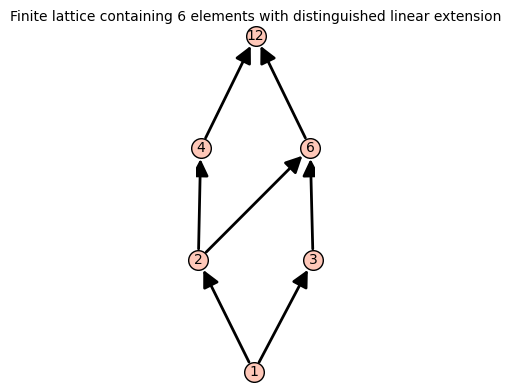

In [7]:
P = Posets.DivisorLattice(12); P

In [10]:
def interval_closed_sets(P):
    ICS = []
    for A in P.antichains_iterator():
        I = P.subposet(P.order_ideal(A))
        Q = P.subposet(Set(I).difference(A))
        for B in Q.antichains_iterator():
            ICS.append(Set(I).difference(Set(P.order_ideal(B))))
    return ICS

def interval_closed_sets_count(P):
    ICS_count = 0
    for A in P.antichains_iterator():
        I = P.subposet(P.order_ideal(A))
        Q = P.subposet(Set(I).difference(A))
        ICS_count += len(list(Q.antichains()))
    return ICS_count

In [11]:
#For graphing
def subset_color_dictionary(P, subset):
    output = {}
    output['red']= subset
    return output

def subset_plot(P, subset):
    plot = P.plot(element_colors = subset_color_dictionary(P, subset))
    return plot

It is known that divisors posets can be drawn as _rectangle posets_. We wanted to count, for divisors posets of numbers with two different prime factors, a specific type of interval-closed sets, namely those that have elements in all the chains.

In [4]:
def subset_color_dictionary_chains(a, b):
    output = {}
    for x in range(a): 
        color = list(colors)[x+11]  # The offset  (11) is just so the colors are nicer
        output[color] = [(x, y) for y in range(b)]
    return output

def color_all_a_chains(a, b, label=True):
    P = Posets.ProductOfChains((a, b))
    coloring = subset_color_dictionary_chains(a, b)
    return P.plot(element_colors = coloring, label_elements=label)

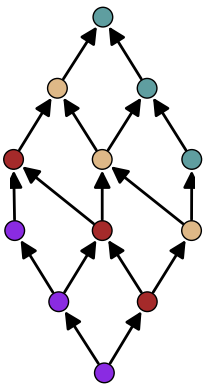

In [8]:
# All four chains have a different color here
color_all_a_chains(4,3, label=False)

We were wondering how many interval-closed sets had items in all $a$ chains for the divisors poset of $2^{a-1}3^{b-1}$.

The left-hand side subset (in red) has items in all 4 chains, while the one on the right does not (no element in top chain).

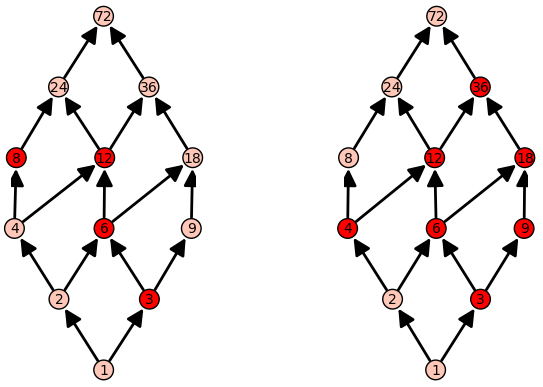

In [12]:
P = Posets.DivisorLattice(72);
graphics_array([subset_plot(P, (3,6,8,12)), subset_plot(P, (3,4,6,9,12, 18, 36))])

### Counting interval-closed sets with items in all $a$ chains
(Naive) method:
- listing all interval-closed sets
- For each of them, checking if they have items in all $a$ chains
- Counting the successful candidates

**Questions**:
- How is this on memory?
- How is this on time?

In [9]:
def has_elements_in_all_a_chains(I, a):
    chain = [False for _ in range(a)]
    try:
        for x in I:
            chain[x[0]] = True
    except:
        print(x, chain, a)
    if chain == [True for _ in range(a)]:
        return True
    return False

def count_ICS_that_have_elements_in_all_a_chains(a, b):
    count = 0
    P = Posets.ProductOfChains([a, b])
    for A in P.antichains_iterator():
        J = P.subposet(P.order_ideal(A))
        Q = P.subposet(Set(J).difference(A))
        for B in Q.antichains_iterator():
            I = Set(J).difference(Set(P.order_ideal(B)))
            if has_elements_in_all_a_chains(I, a):
                count += 1
    return count

In [10]:
counts = []
for s in range(2,9):
    counts.extend([count_ICS_that_have_elements_in_all_a_chains(s-b, b) for b in range(1, s+1)])
print(counts, '\n', oeis(counts))  # Requires internet access. If you don't have it, replace this line with `print(counts)`, and enter the output in the OEIS.

[1, 1, 1, 3, 1, 1, 6, 6, 1, 1, 10, 20, 10, 1, 1, 15, 50, 50, 15, 1, 1, 21, 105, 175, 105, 21, 1, 1, 28, 196, 490, 490, 196, 28, 1] 
 0: A001263: Triangle of Narayana numbers T(n,k) = C(n-1,k-1)*C(n,k-1)/k with 1 <= k <= n, read by rows. Also called the Catalan triangle.


The first comment in the entry for sequence A001263 of the OEIS is that it is the "number of antichains (or order ideals) in the poset 2\*(k-1)\*(n-k)".

This put us on track to establish a bijection between order ideals of 2*a*(b-1) (the divisor poset of $2^{a-1}3^{b-2}5$) and interval-closed sets of a*b (the divisor poset of $2^{a-1}3^{b-1}$) with items in all $a$ chains.

In our paper (Section 4.1), we indeed show that this is a bijection, and conclude that they are counted by the Narayana numbers, as suggested by the OEIS.

**<span style="color:red">Open problem</span>**

* It is an open problem to find the number of interval-closed sets of a divisor poset in general, and even of the divisor poset of $2^{a}3^{b}$. Some partial results appear in our paper. Among them, we know the number of interval-closed sets of the divisor poset of $2 \cdot3^{b}$.

See the [paper]((https://arxiv.org/abs/2307.08520) for details if you are interested in working on this problem, or the [Sage notebook with computations for this project](https://cocalc.com/share/public_paths/5822cfb981981aef12b7b93c71695d92bfb616c7).

# Takeaway

- Databases are incredibily helpful in finding bijections, or noticing correspondence in integer sequences
- There is definitely something exciting in realizing that the data you have also appears somewhere else (just like when you hear sampling from a song in another one, and are trying to recognize it). It usually suggests an **interesting bijection**.

# A Bijectionist's toolkit

### There is now a tool to find bijections automatically!

- Very recent tool
- Included in SageMath starting with version 10.0.
- Find bijections automatically, after you give it a start set, an end set, and constraints.

This worksheet is to be used with the Bijectionist's toolkit, a tool that comes with SageMath 10.0 onwards.
Extended documentation can be found at https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/bijectionist.html, and an extended abstract written for the Conference _Formal Power Series and Algebraic Combinatorics_ is available [here](https://www.mat.univie.ac.at/~slc/wpapers/FPSAC2023/91.pdf) and contains multiple examples.

Author: Nadia Lafrenière, [nadia.lafreniere@concordia.ca](mailto:nadia.lafreniere@concordia.ca)

Acknowledgements: The author is grateful to the developers of the tool (Alexander Grosz, Tobias Kietreiber, Stephan Pfannerer and Martin Rubey), as well as Stephan Pfannerer for his patient explanations and encouraging thoughts.

## Setup

- Start set $A$
- End set $B$
- We want a bijection $A \to B$. Of course, we need that $|A| = |B|$.

### Constraints
The bijections will be found by a computer, so they might not be beautiful, or interesting... This is why we give it *constraints*.

Example of constraints:
- It must preserve a statistics
- We might want it to commute with some other functions
- We might want to fix some values of the bijection

### Interesting bijections

We care about bijections because:
- They show that two sets have the same size, and this is sometimes hard otherwise
- They show that two features, or statistics, have the same distribution. 
- **Example** : The Narayana numbers count both the number of Dyck Paths with $2n$ steps and $k$ peaks, and the number of rooted trees with $n$ nodes and $k$ leaves. So there must exist a bijection that sends peaks of the Dyck path to leaves of the tree. (See [Wikipedia](https://en.wikipedia.org/wiki/Narayana_number#Rooted_trees).)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 2]

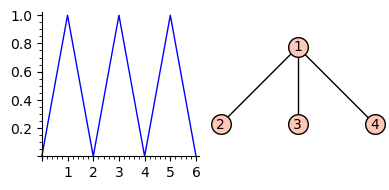

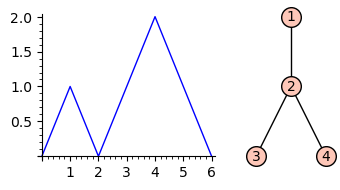

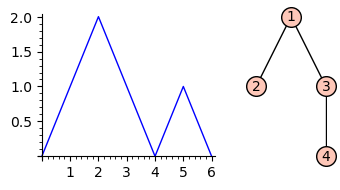

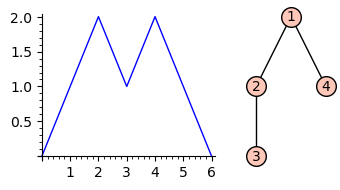

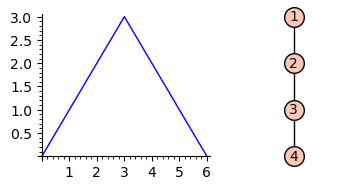

In [3]:
n = 3
A = DyckWords(n)
B = OrderedTrees(n+1)

def alpha1(d): return len(d.peaks())

def beta1(t): return findstat(167)(t)  # findstat statistics #167 is the number of leaves in an ordered tree

bij = Bijectionist(A, B)  # We call the Bijectionist!

bij.set_statistics((alpha1, beta1))

sol = next((bij.solutions_iterator()))

for key in sol.keys():
    show(graphics_array([key.plot(), sol[key].plot()]))

We can even see what all the constraints are on the bijection.

In [111]:
list(bij.minimal_subdistributions_iterator())

[([[1, 0, 1, 0, 1, 0, 1, 0]], [[[], [], [], []]]),
 ([[1, 1, 1, 1, 0, 0, 0, 0]], [[[[[[]]]]]]),
 ([[1, 0, 1, 1, 1, 0, 0, 0],
   [1, 1, 0, 0, 1, 1, 0, 0],
   [1, 1, 0, 1, 1, 0, 0, 0],
   [1, 1, 1, 0, 0, 0, 1, 0],
   [1, 1, 1, 0, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0]],
  [[[], [[[]]]],
   [[[]], [[]]],
   [[[], [[]]]],
   [[[[]]], []],
   [[[[]], []]],
   [[[[], []]]]]),
 ([[1, 0, 1, 0, 1, 1, 0, 0],
   [1, 0, 1, 1, 0, 0, 1, 0],
   [1, 0, 1, 1, 0, 1, 0, 0],
   [1, 1, 0, 0, 1, 0, 1, 0],
   [1, 1, 0, 1, 0, 0, 1, 0],
   [1, 1, 0, 1, 0, 1, 0, 0]],
  [[[], [], [[]]],
   [[], [[]], []],
   [[], [[], []]],
   [[[]], [], []],
   [[[], []], []],
   [[[], [], []]]])]

**Exercise**: how many solutions are there, to do a bijection that meets our constraints (for $n=4$)?

There are $6!\times 6!$ possible bijections, because in each block, we can match any path with any tree.

### Pros and cons of the bijectionist
The bijectionist requires that the statistics satisfies $$\sum_{\pi} q^{s(\pi)} = \sum_{\pi} q^{\tau(\pi)},$$
so that they are equidistributed.

- It is not hard to check whether two statistics are equidistributed, or whether two sets are even in bijection with one another.
- The power of the bijectionist toolkit is that it allows to add constraints that makes *ad hoc* checking hard.

The bijectionist can give a bijection that works for example for all values less than 10. However, it does so by matching elements to satisfy constraints, but it might not give a general description to make it a nice conjecture.

## Bijectionist's Takeaway
- The bijectionist is a new tool, that is very powerful to put us on track of some bijections
- It would be even stronger if it could come with a story to explain how the bijection works, but this is the job of combinatorialists
- It works well with open databases such as FindStat.

# Before I go

- I would like to thank Dr. James and Pr. Sylvester for organizing this great school, and for too much delicious food!
- I would like to thank the TAs for their support with exercises and for deeply valuable discussions on our culture.
- I would *really* like to thank the students for their desire to learn, their participation, and for introducing us to East African cultures.
### Asante Sana!